In [3]:
# When train the model change runtime as GPU and during the export change to CPU
# YOLO all models - https://docs.ultralytics.com/models/yolov10/#model-variants
#https://docs.ultralytics.com/models/yolov9/#usage-examples
# https://docs.ultralytics.com/usage/cfg/#train-settings
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Change runtime to
# A100 GPU: Up to 80 GB
# L4 GPU: 24 GB
# T4 GPU: 16 GB
# TPU v2: 8 GB HBM per core
# We have 100 purches of runtime from colab pro
# used 6 runtime that mean number of use

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jul 26 08:12:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              49W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
# # Split the datasets into train and test
# !pip install split-folders
# import splitfolders

# # Define the path to your dataset
# dataset_path = '/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/'

# # Split the dataset into train (70%) and val (30%)
# splitfolders.ratio(dataset_path, output="/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/data/", seed=1337, ratio=(0.7, 0.3), group_prefix=None)

In [4]:
!pip install ultralytics -q # -q for dont sow installation details
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 99.9 MB/s eta 0:00:00


In [5]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8m-seg.pt')  # yolov8m-seg.pt, yolov8s.pt

100%|██████████| 52.4M/52.4M [00:00<00:00, 360MB/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
# %cat /content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin_ucd/config.yaml
%cat /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/config.yaml

train: '/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train/images/'
val: '/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/val/images/'
nc: 1
names: ["Tree"]


In [ ]:

import os
from PIL import Image

# Check a few images and labels
train_image_dir = '/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin_ucd/val/images/'
train_label_dir = '/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin_ucd/val/labels/'

# # Check a few images and labels
# train_image_dir = '/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree//images'
# train_label_dir = '/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/labels'

# Verify that images and labels match
image_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)

print(f"Number of training images: {len(image_files)}")
print(f"Number of training labels: {len(label_files)}")


In [ ]:
# from ultralytics import YOLO

# model = YOLO('yolov8m-seg.pt')  # yolov8m-seg.pt, yolov8s.pt

# in this format result is better than bellow one Train the model
model.train(
    data='/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/config.yaml',
    epochs=150,  # Number of epochs
    imgsz=801,  # Image size
    batch=8,  # Batch size (adjust based on your GPU memory),  batch=16 lower batch provide more generalize details result
    lr0=0.01,  # Initial learning rate
    optimizer='auto',  # Optimizer
    device= 0,  # Use GPU = 0(set to 'cpu' if using CPU)
    workers=8,  # Number of data loading workers
    flipud=0.5,  # Vertical flip with a probability of 50%
    fliplr=0.5, # Horizontal flip with a probability of 50%
    degrees= 45.0,  # Rotation in degrees (±45 degrees)
    mosaic=1.0,  # Mosaic augmentation with a probability of 100%
    mixup=0.5,  # MixUp augmentation with a probability of 50%
    hsv_h=0.015,  # HSV hue augmentation
    hsv_s=0.7,  # HSV saturation augmentation
    hsv_v=0.4,  # HSV value augmentation
    translate=0.1,  # Translation
    scale=0.5,  # Scaling
    shear=2.0,  # Shear
    name='/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8',  # Name of the run
    save_period=1,  # Save model every epoch
    cache=True  # Cache images for faster training
)

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/config.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=801, save=True, save_period=1, cache=True, device=0, workers=8, project=None, name=train_150_bz8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 755k/755k [00:00<00:00, 91.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 406MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[801] must be multiple of max stride 32, updating to [832]


train: Scanning /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train/labels.cache... 618 images, 1 backgrounds, 0 corrupt: 100%|██████████| 619/619 [00:00<?, ?it/s]
train: Caching images (1.2GB RAM): 100%|██████████| 619/619 [00:27<00:00, 22.63it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/val/labels.cache... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<?, ?it/s]
val: Caching images (0.4GB RAM): 100%|██████████| 199/199 [00:30<00:00,  6.55it/s]


Plotting labels to /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 832 train, 832 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      11.7G      1.729      3.199      1.787      1.605         40        832: 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        199       2600     0.0306       0.48      0.022     0.0132     0.0299      0.436     0.0204     0.0106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      9.91G      1.559      2.904      1.398      1.474        137        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        199       2600      0.104      0.507     0.0733     0.0385      0.102      0.478     0.0666     0.0309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      9.95G      1.588      2.956      1.372      1.479        107        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        199       2600      0.738      0.672      0.734      0.436      0.738      0.672      0.734      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      10.2G      1.565       2.87      1.346       1.46        144        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.80it/s]

                   all        199       2600      0.655      0.645      0.688      0.414      0.655      0.644      0.685      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      10.2G      1.554      2.804      1.329      1.458        178        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        199       2600      0.737      0.685      0.757      0.452      0.736      0.683      0.753      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      9.88G      1.525      2.779      1.306      1.454        176        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        199       2600      0.743      0.669      0.761      0.474      0.719      0.692      0.758       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      10.9G      1.485      2.661      1.225      1.412        105        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]

                   all        199       2600      0.718      0.691       0.75      0.459      0.722      0.695       0.75      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      9.34G      1.499      2.708      1.259      1.426        152        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]

                   all        199       2600      0.753      0.685      0.767      0.484      0.745      0.695      0.764      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      11.5G      1.517      2.743       1.24      1.444        170        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]

                   all        199       2600      0.726      0.677      0.741      0.453       0.72      0.688      0.745      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      9.31G      1.445      2.654      1.242      1.405        173        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        199       2600      0.718      0.698       0.75      0.472      0.728      0.695       0.75      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150        10G      1.462      2.616      1.174      1.412         86        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.60it/s]

                   all        199       2600      0.741      0.689      0.767      0.478      0.746      0.682      0.762      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      9.86G      1.459      2.618      1.182      1.405         85        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        199       2600      0.718      0.707      0.772      0.477      0.725      0.701      0.774      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      10.2G      1.429      2.568      1.159       1.39         75        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        199       2600      0.739      0.688      0.767      0.481      0.741      0.695      0.767      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150       8.8G      1.442      2.593      1.162      1.389        100        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.51it/s]

                   all        199       2600      0.754        0.7       0.78      0.493      0.758        0.7      0.782      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      11.2G      1.444       2.57      1.164      1.394        182        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        199       2600      0.707      0.658      0.737      0.458      0.707      0.658      0.736      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      9.03G      1.412      2.551      1.144      1.387        130        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        199       2600      0.726      0.717      0.766      0.479       0.73      0.713      0.764      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.96G      1.417      2.509      1.123      1.381        130        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        199       2600      0.726      0.715      0.772      0.482      0.738      0.712      0.777      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      9.32G      1.404      2.513      1.124      1.368         64        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.95it/s]

                   all        199       2600      0.741      0.672      0.763      0.484      0.745      0.674      0.762      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      10.6G      1.393       2.47      1.092      1.354         87        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]

                   all        199       2600      0.752       0.69      0.779      0.491      0.753        0.7      0.782      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      11.8G       1.41       2.53      1.108      1.382        138        832: 100%|██████████| 78/78 [00:33<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        199       2600      0.723      0.693      0.764      0.478      0.728      0.697      0.764      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150        10G      1.377      2.438      1.073      1.356        167        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        199       2600      0.758      0.699       0.79      0.501      0.763      0.702      0.792      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      10.9G      1.363      2.409      1.059      1.336         71        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        199       2600      0.787      0.686      0.786      0.502      0.795      0.685      0.786      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150        10G      1.377      2.444       1.08      1.357         32        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.749      0.707      0.787        0.5      0.748      0.706      0.783      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      11.8G      1.371      2.447      1.066      1.345        100        832: 100%|██████████| 78/78 [00:33<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        199       2600      0.783      0.711        0.8        0.5      0.786      0.712      0.796      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      10.2G      1.378      2.426      1.041      1.349         91        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.75it/s]

                   all        199       2600      0.754      0.721      0.783      0.493      0.756      0.721      0.777      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.17G      1.355      2.367      1.019      1.325        104        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]

                   all        199       2600       0.77       0.71      0.785      0.498       0.78      0.706      0.785      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      10.1G      1.365      2.394      1.034      1.332        159        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]

                   all        199       2600       0.76      0.716      0.797      0.511      0.765      0.708      0.794      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      10.2G      1.362       2.44      1.044      1.339        225        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]

                   all        199       2600      0.757      0.698      0.791      0.507       0.76      0.702      0.789      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      10.5G      1.353      2.401      1.033      1.334        111        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]

                   all        199       2600      0.738      0.704      0.774      0.493      0.731      0.707      0.769      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      9.61G       1.35      2.401      1.029       1.33        114        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]


                   all        199       2600      0.799      0.695      0.799      0.505      0.795      0.693      0.793       0.51

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      11.1G      1.338      2.367      1.015      1.326        101        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]

                   all        199       2600      0.765        0.7      0.793      0.503      0.759       0.71      0.793      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      9.54G      1.357      2.402      1.035      1.338        141        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]

                   all        199       2600      0.773        0.7      0.796      0.508      0.769      0.708      0.798      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      9.99G      1.326       2.37      1.018      1.323        121        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]

                   all        199       2600      0.752      0.728      0.797      0.505      0.757      0.727      0.798      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      11.2G      1.325      2.361      1.004      1.316         97        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        199       2600      0.745      0.653      0.749      0.481      0.742      0.652      0.746      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      10.1G       1.33      2.342     0.9974      1.314        215        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]

                   all        199       2600      0.776       0.72      0.797      0.505      0.773       0.72      0.794      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      9.47G      1.335      2.357      1.003      1.325         78        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.50it/s]

                   all        199       2600      0.747      0.697      0.777      0.492      0.745      0.702      0.775      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.78G      1.326      2.325     0.9804      1.306         93        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]

                   all        199       2600      0.779       0.72      0.794      0.499      0.775      0.716      0.787      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150       8.8G      1.304      2.302     0.9669      1.302         78        832: 100%|██████████| 78/78 [00:33<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.72it/s]

                   all        199       2600      0.765      0.717      0.798      0.504      0.765      0.717      0.795      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150        11G      1.312      2.314     0.9742      1.303        110        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        199       2600      0.773      0.717      0.803       0.51       0.77      0.715      0.797      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      9.06G      1.306       2.32     0.9657        1.3         95        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.17it/s]

                   all        199       2600      0.776      0.702      0.796      0.508      0.774      0.712      0.793      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      9.66G      1.318      2.343     0.9636        1.3        190        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        199       2600      0.748      0.705      0.784      0.497      0.755      0.705      0.784      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150        11G      1.311      2.293     0.9568      1.299        138        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        199       2600      0.785      0.706      0.795      0.506      0.786      0.702      0.792      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      9.63G      1.287       2.25     0.9343      1.285         87        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        199       2600      0.766      0.717      0.795      0.517      0.769      0.713      0.794      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      9.41G      1.311      2.284     0.9397       1.29        102        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]

                   all        199       2600       0.76      0.712      0.788      0.506      0.759      0.714      0.787      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.72G      1.291      2.271     0.9437      1.294         93        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        199       2600      0.771      0.701      0.798      0.521      0.773      0.702      0.798      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      10.8G      1.288      2.271     0.9409      1.282        122        832: 100%|██████████| 78/78 [00:33<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        199       2600      0.709       0.75      0.777      0.495      0.728      0.727      0.775      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      9.86G      1.284      2.279     0.9286      1.289         71        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.72it/s]

                   all        199       2600      0.754      0.756      0.818      0.523      0.752      0.745      0.807      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      10.5G      1.275      2.265     0.9307       1.28         47        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.50it/s]

                   all        199       2600      0.794      0.703      0.801      0.516      0.795      0.705        0.8      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      9.91G      1.277      2.222     0.9191      1.272        147        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        199       2600      0.738      0.698      0.763      0.496      0.728      0.705       0.76      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      9.88G      1.266       2.21     0.9029      1.274         94        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        199       2600      0.765      0.712      0.795      0.509      0.763      0.713      0.791      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      9.65G      1.292      2.291     0.9339      1.283        140        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]

                   all        199       2600      0.756      0.722       0.79       0.51      0.756      0.722      0.788      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      9.62G      1.272      2.248     0.9315      1.279         90        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.74it/s]

                   all        199       2600      0.739      0.717      0.781      0.508       0.74      0.718      0.779      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150        10G      1.255      2.198     0.8956      1.265        101        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        199       2600      0.757       0.73        0.8      0.517      0.755      0.727      0.794      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      9.65G      1.252      2.203     0.8846      1.254        173        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.39it/s]

                   all        199       2600      0.741      0.754      0.803      0.512      0.745      0.742      0.797       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.97G      1.242      2.174      0.871      1.253        140        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]

                   all        199       2600      0.685       0.75      0.793      0.516      0.686      0.745      0.786      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      10.7G      1.274      2.231     0.8989      1.271        161        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]

                   all        199       2600      0.738        0.7      0.764      0.491      0.734      0.704      0.762      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      9.88G      1.261      2.226     0.8924      1.272        122        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.50it/s]

                   all        199       2600       0.76      0.735      0.805      0.517      0.764      0.725      0.797      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      10.6G      1.255      2.198     0.8805      1.265        172        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]

                   all        199       2600      0.752      0.723      0.786      0.512      0.753       0.72      0.783      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      11.4G      1.238      2.168     0.8653       1.25         68        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.82it/s]

                   all        199       2600      0.794      0.695        0.8      0.514      0.797      0.697      0.796      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      10.1G      1.241      2.174     0.8646       1.26        168        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]

                   all        199       2600      0.771      0.716      0.797      0.518      0.773      0.716      0.796      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      12.4G      1.226      2.164      0.859      1.246         62        832: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        199       2600      0.745       0.73        0.8      0.524      0.753      0.728      0.799      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      9.45G      1.225      2.165     0.8561      1.245         86        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        199       2600      0.789      0.717       0.81      0.519      0.786      0.715      0.804      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      10.4G      1.234      2.164     0.8555       1.25        115        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.73it/s]

                   all        199       2600      0.786      0.727      0.812      0.527      0.787      0.721      0.806      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150       9.4G      1.229      2.133     0.8374      1.238         45        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        199       2600      0.769      0.713      0.794      0.512      0.769      0.713      0.792      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      10.1G      1.221      2.165      0.836      1.239         80        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.62it/s]

                   all        199       2600      0.799      0.703      0.806      0.522      0.803      0.702      0.802      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.42G      1.202      2.079     0.8266      1.229         82        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.777      0.717      0.799       0.52      0.777      0.719      0.798      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.65G      1.227      2.155     0.8284      1.244        165        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        199       2600      0.764       0.73      0.797      0.518      0.764      0.726      0.793      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      9.92G      1.233      2.158     0.8347      1.247         97        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]

                   all        199       2600       0.77      0.717      0.796      0.512       0.77      0.716      0.795      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.83G      1.212      2.143     0.8323      1.246        100        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]

                   all        199       2600      0.801      0.676       0.79      0.511      0.801      0.676      0.786      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150       9.4G      1.189      2.101     0.8156      1.228        131        832: 100%|██████████| 78/78 [00:33<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        199       2600      0.768      0.718      0.801      0.518      0.765      0.717      0.797      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      10.7G      1.198       2.11     0.8241      1.239        131        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        199       2600      0.758      0.724      0.802      0.518      0.757      0.722      0.798      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      9.72G      1.188      2.092     0.8026      1.226        198        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        199       2600      0.779      0.732      0.809      0.518      0.776      0.731      0.804       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      11.7G      1.195      2.086     0.8193      1.225        100        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]

                   all        199       2600      0.801      0.696      0.794      0.511      0.802      0.694      0.791      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      10.4G      1.202      2.124     0.8286      1.236         73        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.33it/s]

                   all        199       2600      0.794      0.727      0.811      0.524      0.792      0.725      0.807      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      9.86G      1.211      2.145     0.8227       1.23        104        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        199       2600      0.789       0.72      0.809      0.526      0.787      0.717      0.804      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      11.4G        1.2      2.126     0.8129       1.22         35        832: 100%|██████████| 78/78 [00:33<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.754      0.743      0.803      0.519      0.762      0.737      0.799      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      9.71G      1.189      2.072     0.7855      1.215         84        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        199       2600      0.774      0.712      0.799      0.517      0.784      0.708      0.797      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      10.1G       1.18      2.099     0.7986      1.223         24        832: 100%|██████████| 78/78 [00:35<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        199       2600      0.764      0.733      0.805      0.519      0.763      0.732      0.801      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      11.3G      1.185      2.094     0.7921      1.217        151        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        199       2600      0.794      0.714      0.802       0.52       0.79      0.712      0.798      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      11.1G      1.163      2.065     0.7745      1.205        106        832: 100%|██████████| 78/78 [00:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        199       2600      0.793      0.713      0.809       0.52      0.805      0.708      0.806      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      10.2G      1.171      2.044     0.7762      1.201         53        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]

                   all        199       2600      0.747      0.752      0.802      0.523      0.753      0.742        0.8      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.59G      1.163      2.032     0.7781        1.2        105        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        199       2600       0.76      0.716      0.793      0.518      0.741      0.735      0.792       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      9.41G       1.17      2.074     0.7811      1.209         98        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.39it/s]

                   all        199       2600      0.803      0.716      0.813      0.526      0.793      0.726      0.809      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      9.08G      1.162       2.07     0.7844      1.215        164        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        199       2600      0.788      0.708      0.803      0.524      0.787      0.707      0.798      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      9.31G      1.141      1.995     0.7517      1.192        139        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]

                   all        199       2600      0.753      0.716      0.794      0.521      0.755      0.718      0.793       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      9.05G      1.127      1.976     0.7399      1.186         94        832: 100%|██████████| 78/78 [00:33<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.39it/s]

                   all        199       2600      0.771      0.728      0.806      0.527      0.771      0.729      0.803       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      10.8G      1.151      2.047     0.7609      1.199         90        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.76it/s]

                   all        199       2600      0.776       0.73      0.807      0.525      0.779      0.735      0.806      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      9.85G      1.148      2.036     0.7603      1.196         75        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]

                   all        199       2600      0.766      0.702       0.79      0.516      0.757      0.714      0.789      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      10.1G       1.15      2.038     0.7503      1.199         68        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]

                   all        199       2600      0.776      0.721      0.807      0.524      0.778      0.722      0.804      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      11.2G      1.125      1.967     0.7336      1.183         74        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]

                   all        199       2600      0.775       0.72      0.803      0.526      0.771      0.726      0.801      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150        11G      1.148      2.037      0.764      1.186        177        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.04it/s]

                   all        199       2600      0.774      0.723      0.808      0.529      0.776      0.728      0.809      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      10.9G      1.128      1.999      0.742      1.181        148        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        199       2600      0.799      0.704       0.81      0.528      0.777      0.721      0.808      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      10.5G      1.124      1.982     0.7414      1.174         61        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.03it/s]

                   all        199       2600      0.767      0.735      0.814      0.533      0.761      0.737      0.809      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150       9.8G      1.128       1.98     0.7265      1.176        151        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        199       2600      0.767      0.742      0.815      0.528      0.768      0.743      0.812      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      11.5G      1.118      1.986     0.7177      1.176         79        832: 100%|██████████| 78/78 [00:33<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        199       2600      0.769      0.718      0.802      0.521      0.739      0.747        0.8       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      10.1G      1.133      1.994     0.7306      1.182         94        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        199       2600      0.779      0.713      0.801      0.518      0.777      0.711      0.797      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      10.4G      1.107      1.975     0.7296      1.177        103        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.775       0.72      0.803       0.52      0.774      0.721        0.8      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.95G      1.118      1.972     0.7177       1.17         74        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]

                   all        199       2600      0.772      0.749      0.812      0.529      0.774      0.743      0.806      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      10.3G      1.116      1.973     0.7227      1.176         83        832: 100%|██████████| 78/78 [00:35<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]

                   all        199       2600      0.807      0.709      0.814      0.528      0.802      0.712      0.808      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      9.82G      1.117      1.996     0.7252      1.178         75        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]

                   all        199       2600      0.768      0.737      0.813       0.53      0.764      0.733      0.805      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      11.7G        1.1      1.961     0.7136      1.159        155        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]

                   all        199       2600      0.771      0.728      0.807      0.526      0.779      0.723      0.803      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      10.6G      1.142      2.025     0.7338      1.186         95        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]

                   all        199       2600      0.771      0.742       0.81      0.528      0.772      0.743      0.809      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      10.4G      1.098      1.949     0.7042      1.165        158        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        199       2600      0.756      0.742      0.807      0.529      0.756      0.744      0.803       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      9.84G      1.095      1.971     0.7064      1.171         91        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.39it/s]

                   all        199       2600      0.768      0.734      0.811      0.531      0.777      0.726      0.811      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      10.1G      1.067      1.882     0.6761      1.147        102        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]

                   all        199       2600      0.778      0.737      0.813      0.528       0.78      0.735      0.809      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.98G      1.093      1.932     0.6971      1.165         92        832: 100%|██████████| 78/78 [00:33<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.772      0.745      0.809      0.526      0.773      0.746      0.807       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      10.4G       1.11      1.965     0.7148      1.178        128        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.17it/s]

                   all        199       2600      0.786       0.72      0.802      0.523      0.787      0.718        0.8      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      9.81G      1.079      1.909     0.6905      1.153         55        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]

                   all        199       2600      0.778      0.747      0.812      0.531       0.77      0.746      0.809      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      12.1G      1.092      1.938     0.6944       1.16        156        832: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]

                   all        199       2600      0.788       0.73      0.812       0.53      0.783      0.734       0.81      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.83G      1.085       1.94     0.6911      1.159        135        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        199       2600      0.781      0.738      0.813      0.531       0.78      0.745       0.81      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      12.5G      1.077      1.908     0.6858      1.147         93        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        199       2600       0.77       0.74      0.809      0.526      0.766      0.744      0.806      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      9.87G      1.073      1.906     0.6785      1.153        114        832: 100%|██████████| 78/78 [00:33<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]

                   all        199       2600      0.766      0.746      0.809      0.525      0.771      0.743      0.807      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      10.2G      1.051      1.876     0.6697       1.14         73        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]

                   all        199       2600      0.782      0.739      0.812      0.527      0.785      0.732      0.806      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      10.6G      1.073       1.91     0.6791      1.144         96        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]

                   all        199       2600      0.774      0.751       0.82      0.534      0.772      0.748      0.814       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      9.79G      1.047      1.864     0.6628      1.136        138        832: 100%|██████████| 78/78 [00:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]

                   all        199       2600      0.771      0.748      0.815      0.532      0.775      0.751      0.814       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      10.4G      1.073      1.912     0.6715      1.146        100        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        199       2600      0.789      0.724      0.813      0.531      0.794      0.727      0.813      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      9.61G      1.062      1.898     0.6719      1.145         58        832: 100%|██████████| 78/78 [00:34<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]

                   all        199       2600      0.755      0.748      0.806      0.526      0.757      0.751      0.805      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      10.1G      1.059      1.907     0.6708      1.148         62        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]

                   all        199       2600      0.772      0.732      0.806      0.524      0.772      0.738      0.803      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.89G      1.018      1.793     0.6295       1.12         64        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        199       2600      0.789      0.727       0.81      0.525       0.79      0.731      0.808      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      9.77G      1.036      1.847     0.6506      1.132        131        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.91it/s]

                   all        199       2600       0.78      0.723       0.81      0.529      0.786      0.726      0.809      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150        10G      1.062      1.904     0.6714       1.14         61        832: 100%|██████████| 78/78 [00:35<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.68it/s]

                   all        199       2600       0.78      0.728      0.811      0.529      0.779      0.733      0.808      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      9.34G       1.03      1.826     0.6367      1.125        115        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.57it/s]

                   all        199       2600       0.78      0.737      0.815      0.532       0.78      0.737      0.812      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      9.57G      1.034      1.849     0.6474      1.124        141        832: 100%|██████████| 78/78 [00:33<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]

                   all        199       2600      0.796      0.724      0.816      0.535      0.794      0.727      0.811      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      9.32G       1.03      1.826     0.6454      1.127         66        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.85it/s]

                   all        199       2600      0.776      0.733      0.813       0.53      0.758      0.747      0.807      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150        11G      1.022      1.814     0.6349      1.128         57        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        199       2600      0.782      0.726      0.814      0.532      0.784      0.724      0.809      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      9.33G      1.017      1.806     0.6357      1.115         87        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]

                   all        199       2600       0.79       0.72      0.812      0.527      0.783      0.728       0.81      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      10.5G      1.023      1.836     0.6391      1.123         64        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]

                   all        199       2600      0.797      0.704      0.809      0.527      0.796      0.711      0.807      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      9.68G      1.016      1.814     0.6295      1.117         69        832: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]

                   all        199       2600      0.763      0.744      0.812      0.528      0.765      0.751      0.809      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      9.08G      1.017      1.802     0.6271      1.108        102        832: 100%|██████████| 78/78 [00:33<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]

                   all        199       2600      0.753      0.754      0.807      0.526      0.754      0.755      0.802      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      10.6G      1.014      1.835     0.6352      1.119        100        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]

                   all        199       2600      0.787      0.717      0.808      0.528      0.773       0.73      0.804      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      9.76G          1      1.788     0.6173      1.102        126        832: 100%|██████████| 78/78 [00:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        199       2600      0.798      0.728      0.817      0.534      0.792      0.733      0.811      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      11.2G          1      1.801     0.6133      1.102        180        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        199       2600       0.79       0.73      0.814      0.532      0.788      0.735      0.809      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      9.25G      1.027      1.846     0.6351      1.125        102        832: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.71it/s]

                   all        199       2600      0.777       0.73      0.805      0.526      0.781      0.734      0.804      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      12.7G      1.006      1.832     0.6271      1.111         91        832: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]

                   all        199       2600      0.783      0.733       0.82      0.533       0.78      0.738      0.816      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150       9.4G     0.9766      1.775     0.6019      1.097         95        832: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.75it/s]

                   all        199       2600       0.77       0.74      0.816      0.533      0.769      0.746      0.812      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      10.1G      1.009      1.798     0.6187      1.114         76        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]

                   all        199       2600      0.766      0.752      0.817      0.534      0.767      0.748      0.813      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      10.7G     0.9907      1.794     0.6041      1.102        108        832: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        199       2600      0.789      0.732      0.817      0.536      0.786      0.734      0.813      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      9.39G     0.9906      1.768     0.6056      1.098         76        832: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]

                   all        199       2600       0.79      0.737      0.821      0.536       0.79      0.737      0.816      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150       9.7G     0.9873      1.776     0.6043      1.101        136        832: 100%|██████████| 78/78 [00:33<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        199       2600      0.771      0.751      0.815      0.532      0.785      0.744      0.814      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      9.76G     0.9957      1.809      0.613      1.106         93        832: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.51it/s]

                   all        199       2600      0.772      0.743      0.817      0.533      0.773      0.744      0.812      0.543


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150       9.2G      1.188       2.06     0.8381      1.246         98        832: 100%|██████████| 78/78 [00:17<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.19it/s]

                   all        199       2600      0.798      0.715      0.811      0.529        0.8      0.717      0.812      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      8.73G       1.14      1.938     0.7512        1.2         33        832: 100%|██████████| 78/78 [00:14<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.30it/s]

                   all        199       2600      0.779      0.752      0.832      0.548      0.767      0.763       0.83      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      9.23G       1.15      1.936     0.7449      1.212         19        832: 100%|██████████| 78/78 [00:14<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]

                   all        199       2600      0.771       0.76      0.832       0.55      0.777      0.756      0.827      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      8.55G      1.141      1.919     0.7214      1.202         11        832: 100%|██████████| 78/78 [00:14<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        199       2600      0.796      0.747      0.834      0.553      0.793      0.746       0.83      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      7.91G      1.147      1.919     0.7428      1.212         45        832: 100%|██████████| 78/78 [00:14<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]

                   all        199       2600      0.787      0.753      0.838      0.551      0.791      0.751      0.834      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      8.63G      1.135      1.919      0.735      1.206         29        832: 100%|██████████| 78/78 [00:14<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.46it/s]

                   all        199       2600      0.776      0.766      0.835      0.554      0.778      0.766      0.834      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.75G      1.118      1.864     0.7138      1.177         43        832: 100%|██████████| 78/78 [00:14<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        199       2600       0.79      0.761      0.834      0.554      0.792       0.76      0.832      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      8.96G       1.11      1.884     0.7041       1.19         40        832: 100%|██████████| 78/78 [00:14<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.46it/s]

                   all        199       2600      0.789      0.761      0.836      0.555      0.789       0.76      0.834      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      9.47G      1.118      1.886     0.7039      1.191         55        832: 100%|██████████| 78/78 [00:14<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]

                   all        199       2600      0.786      0.761      0.837      0.556      0.788       0.76      0.834      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      9.52G      1.108      1.858     0.6992      1.186         30        832: 100%|██████████| 78/78 [00:14<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        199       2600      0.789      0.761      0.837      0.556      0.786      0.759      0.832      0.564



150 epochs completed in 1.601 hours.
Optimizer stripped from /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8/weights/last.pt, 54.9MB
Optimizer stripped from /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8/weights/best.pt, 54.9MB

Validating /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]


                   all        199       2600      0.787      0.761      0.837      0.556      0.786       0.76      0.834      0.564
Speed: 0.3ms preprocess, 10.1ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to /content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae47846ee30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [5]:
my_new_model = YOLO("/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8/weights/best.pt")  # load a custom model multiple class


image 1/1 /content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/63_ID53.tif: 832x832 9 Trees, 803.5ms
Speed: 14.8ms preprocess, 803.5ms inference, 50.4ms postprocess per image at shape (1, 3, 832, 832)


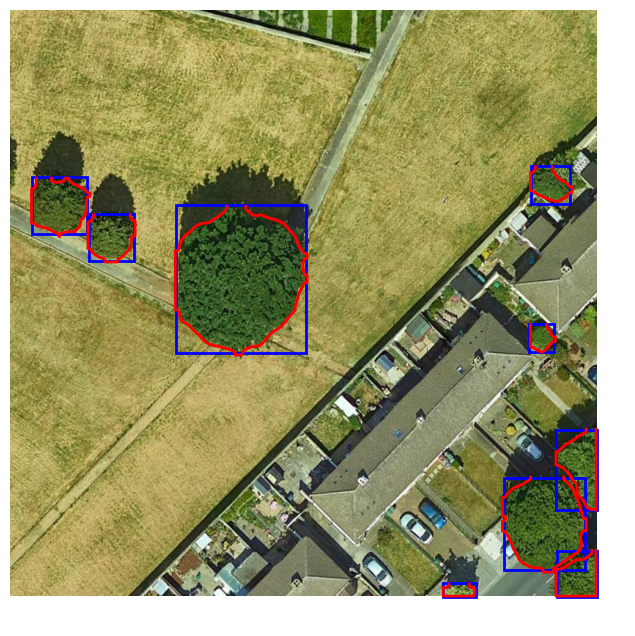

In [6]:
from matplotlib import pyplot as plt
import cv2
img = ("/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/63_ID53.tif")  # predict on an image
#  img = ("/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/test/524_ID42.jpeg")  # predict on an image
new_results = my_new_model(img, conf=0.25, iou=0.2)  #Adjust conf threshold

# Load the image
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure for plotting
plt.figure(figsize=(8, 8))
plt.imshow(img)
ax = plt.gca()

# Loop over the detected objects
for result in new_results:
    boxes = result.boxes  # get the bounding boxes
    masks = result.masks  # get the masks if available
    for box in boxes:
        # Extract the coordinates of the bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # Draw the rectangle boundary
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='blue', linewidth=2)
        ax.add_patch(rect)

    if masks is not None:
        for mask in masks.xy:
            mask_polygon = mask  # Already a numpy array
            plt.plot(mask_polygon[:, 0], mask_polygon[:, 1], 'r-', linewidth=2)

# Show the plot
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/385125027390264.jpg: 416x832 8 Trees, 716.0ms
Speed: 18.1ms preprocess, 716.0ms inference, 73.4ms postprocess per image at shape (1, 3, 416, 832)


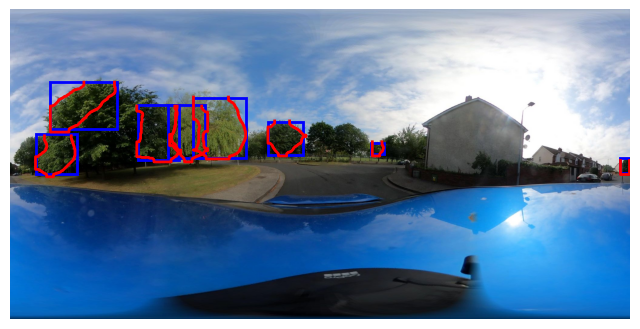

In [ ]:
from matplotlib import pyplot as plt
import cv2
img = ("/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/385125027390264.jpg")  # predict on an image
#  img = ("/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/test/524_ID42.jpeg")  # predict on an image
new_results = my_new_model(img, conf=0.25, iou=0.2)  #Adjust conf threshold

# Load the image
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure for plotting
plt.figure(figsize=(8, 8))
plt.imshow(img)
ax = plt.gca()

# Loop over the detected objects
for result in new_results:
    boxes = result.boxes  # get the bounding boxes
    masks = result.masks  # get the masks if available
    for box in boxes:
        # Extract the coordinates of the bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # Draw the rectangle boundary
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='blue', linewidth=2)
        ax.add_patch(rect)

    if masks is not None:
        for mask in masks.xy:
            mask_polygon = mask  # Already a numpy array
            plt.plot(mask_polygon[:, 0], mask_polygon[:, 1], 'r-', linewidth=2)

# Show the plot
plt.axis('off')
plt.show()

In [ ]:
#https://github.com/ultralytics/ultralytics/issues/1129
#https://docs.ultralytics.com/models/sam-2/#how-does-sam-2-compare-to-other-segmentation-models-like-yolov8
from ultralytics import YOLO

# Load your trained model
model = YOLO('path/to/your/trained_model.pt')

# Validate on the test set
metrics = model.val(data='path/to/your/data.yaml', split='test')
print(metrics.box.map)  # mAP50-95

In [7]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=50390652cdf20bbd1ac2c2cb09da6214a91d3a0855c1401baf6ee85df0af2096
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [13]:
import torch
from torchviz import make_dot
from ultralytics import YOLO  # Assuming you have the YOLOv8 model from Ultralytics

# Load the pretrained YOLOv8 segmentation model

model = YOLO('yolov8m-seg.pt')  # yolov8m-seg.pt, yolov8s.pt
# Create a dummy input tensor with the specified image size
# Create a dummy input tensor with the specified image size
# Forward pass through the model
results = model(dummy_input)

# Extract the tensor (assuming boxes are the required tensor for visualization)
# You may need to adapt this based on your exact requirements
output_tensor = results[0].boxes.xyxy  # Example: Extract bounding boxes tensor

# Visualize the model and save it to a specified directory
dot = make_dot(output_tensor, params=dict(model.named_parameters()))


# Specify the output folder path
output_folder = '/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/'
output_file = f'{output_folder}/yolov8_model'

# Render and save the visualization
dot.render(output_file, format='png')


WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.931264400482178. Dividing input by 255.
0: 640x640 (no detections), 572.1ms
Speed: 0.0ms preprocess, 572.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


'/content/drive/MyDrive/Postdoc_UCD/YOLO/crumlin/test/yolov8_model.png'

In [15]:
net = torch.load('yolov8m-seg.pt')
print(net)

{'date': '2023-01-04T17:22:14.297740', 'version': '8.0.0.dev0', 'license': 'AGPL-3.0 License (https://ultralytics.com/license)', 'docs': 'https://docs.ultralytics.com', 'epoch': -1, 'best_fitness': None, 'model': SegmentationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
   

ModuleNotFoundError: No module named 'ultralytics'